# Function ramp

## Description

Create an 1, 2 or 3-dimensional image with increasing gray value bands. The function receives the output dimension, the number of increasing bands, and the range of values variation in each direction. 

## Synopse


Creates a 1D/2D/3D gray scale image with dimensions given by s, with n increasing gray scale bands with values varying from the specified range

- **g = ramp(s, n, range)**

  - **g**: Image. 


  - **s**: [S H W]: slices, height and width output image dimensions.
  - **n**: [nz ny nx]: number of bands.
  - **range**:  [kz_min, kz_max,ky_min,ky_max,kx_min,kx_max], minimum and maximum gray scale values on z,y and x dimension.

In [70]:
from numpy import *

def ramp(s, n, range=[0,255]):
    aux = array(n)
    s_orig = s

    if len(aux.shape) == 0:
        s = [1,s[0],s[1]]
        n = [0,0,n]
        range = [0,0,0,0,range[0],range[1]]

    slices,rows, cols = s[0], s[1], s[2]
    z,y,x = indices((slices,rows,cols))
    gz = z*n[0]//slices * (range[1]-range[0]) // (n[0]-1) + range[0]
    gy = y*n[1]//rows * (range[3]-range[2]) // (n[1]-1) + range[2]
    gx = x*n[2]//cols * (range[5]-range[4]) // (n[2]-1) + range[4]
    return (gz+gy+gx).reshape(s_orig)

In [71]:
testing = (__name__ == "__main__")
if testing:
    import numpy as np
    import sys,os
    ! jupyter nbconvert --to 'python' ramp
    %matplotlib inline
    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt
    ia898path = os.path.abspath('/home/lotufo')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook ramp.ipynb to python
[NbConvertApp] Writing 3674 bytes to ramp.py


## Examples


Numeric example

In [72]:
if testing:    
    F = ramp([5,7], 3, [4,10])
    print(F)
    print()
    print()
    F = ramp((1,5,7),(0,3,0), [0,0,4,10,0,0])
    print(F)
    print()
    print()
    F = ramp([1,5,7],[3,0,0], [4,10,0,0,0,0])
    print(F)

[[ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]
 [ 4  4  4  7  7 10 10]]


[[[ 4  4  4  4  4  4  4]
  [ 4  4  4  4  4  4  4]
  [ 7  7  7  7  7  7  7]
  [ 7  7  7  7  7  7  7]
  [10 10 10 10 10 10 10]]]


[[[4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]
  [4 4 4 4 4 4 4]]]


Image example

""
""

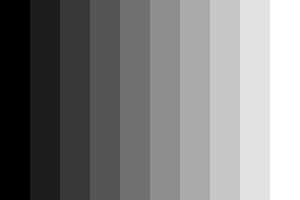

In [73]:
if testing:
    F = ramp([200,300], 10, [0,255])
    nb.nbshow(ia.normalize(F))
    nb.nbshow()

Image example - 3D

""
""
""
""
""
""

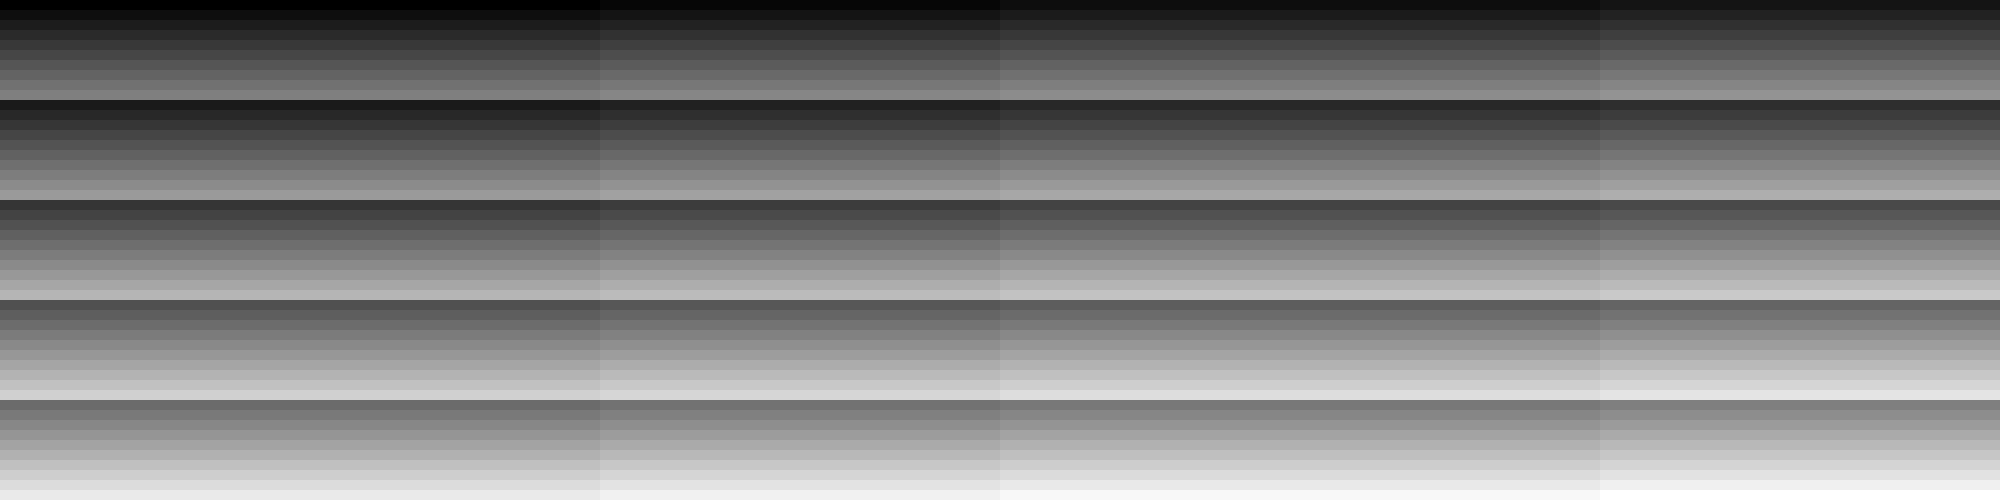
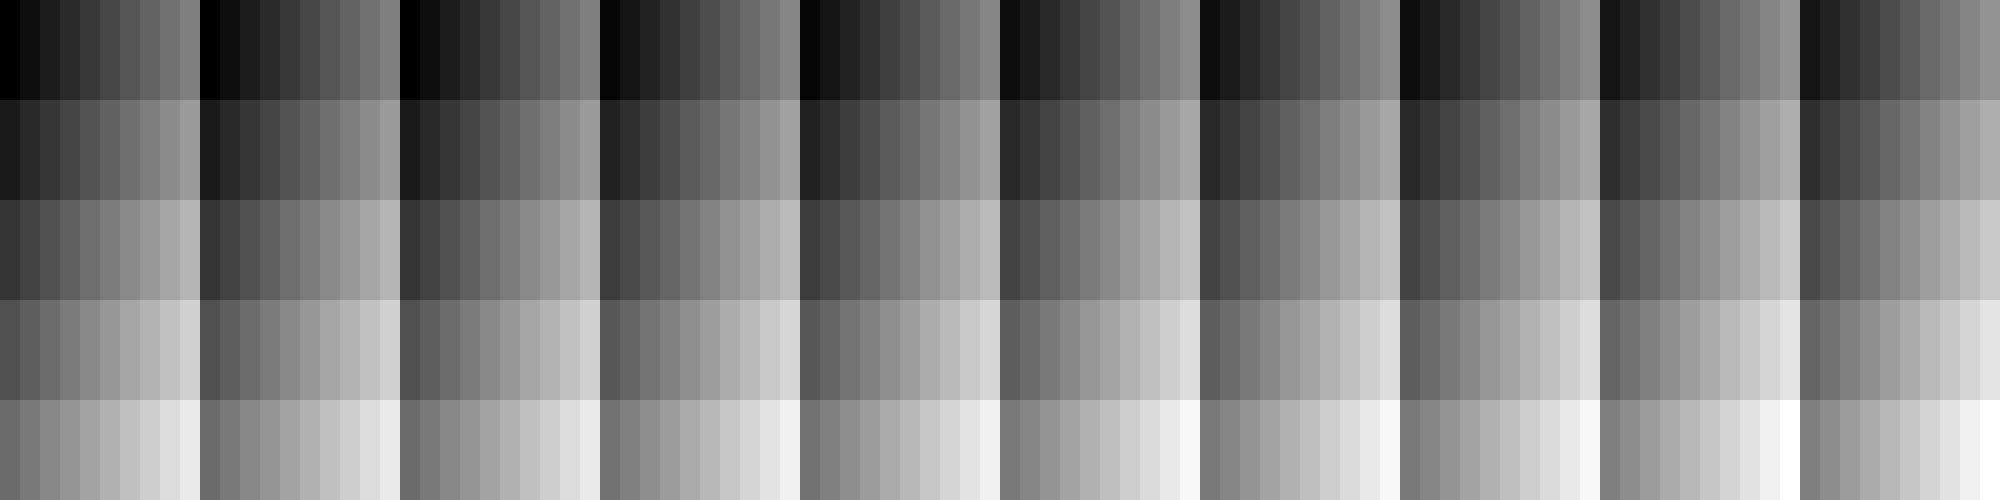
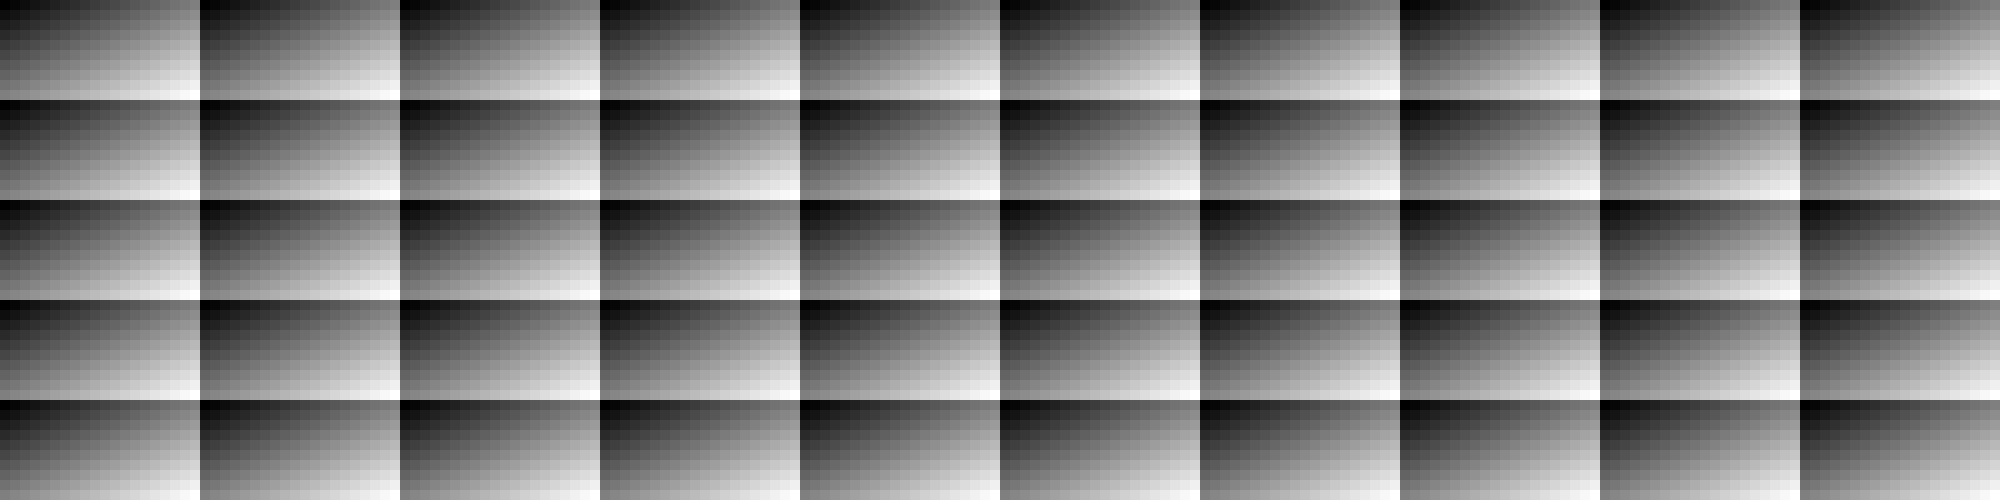

In [53]:
if testing:
    F = ramp([50,100,200], [20,10,0], [0,255,0,255,0,0])
    nb = ia.nbshow(3)
    nb.nbshow(ia.normalize(ia.mosaic(F,10)))
    print()
    F = ramp([50,100,200], [20,0,10], [0,255,0,0,0,255])
    nb.nbshow(ia.normalize(ia.mosaic(F, 10)))
    print()
    F = ramp([50,100,200], [0,10,20], [0,0,0,255,0,255])
    nb.nbshow(ia.normalize(ia.mosaic(F, 10)))
    nb.nbshow()

Image example 2 - 3D

In [54]:
if testing:
    F = ramp([10,20,30], [10,20,30], [0,255,0,255,0,255])
    nb = ia.nbshow(3)
    nb.nbshow(ia.normalize(ia.mosaic(F, 10)))
    print
    F = ramp([10,20,30], [5,5,5], [0,255,0,255,0,255])
    nb.nbshow(ia.normalize(ia.mosaic(F, 10)))
    print
    F = ramp([10,20,30], [2,3,4], [0,255,0,255,0,255])
    nb.nbshow(ia.normalize(ia.mosaic(F, 10)))
    nb.nbshow()

""
""
""
""
""
""


## Equation

$$
g(z,y,x) =  \lfloor \lfloor \frac{n_z}{S} z \rfloor \frac{kz_{max}-kz_{min}}{n_z-1} \rfloor + kz_{min} +\lfloor \lfloor \frac{n_y}{H} y \rfloor \frac{ky_{max}-ky_{min}}{n_y-1} \rfloor + ky_{min} + \lfloor \lfloor \frac{n_x}{W} x \rfloor \frac{kx_{max}-kx_{min}}{n_x-1} \rfloor + kx_{min}
$$

In [74]:
if testing:
    print('testing ramp')
    print(repr(ramp([5,7],3,[5,10])) == repr(array(
          [[5, 5, 5, 7, 7, 10, 10],
           [5, 5, 5, 7, 7, 10, 10],
           [5, 5, 5, 7, 7, 10, 10],
           [5, 5, 5, 7, 7, 10, 10],
           [5, 5, 5, 7, 7, 10, 10]])))

testing ramp
True


## Contributions

- Mariana Pinheiro, 1st semester 2011
- Leonardo Bianconi, 1st semester 2017